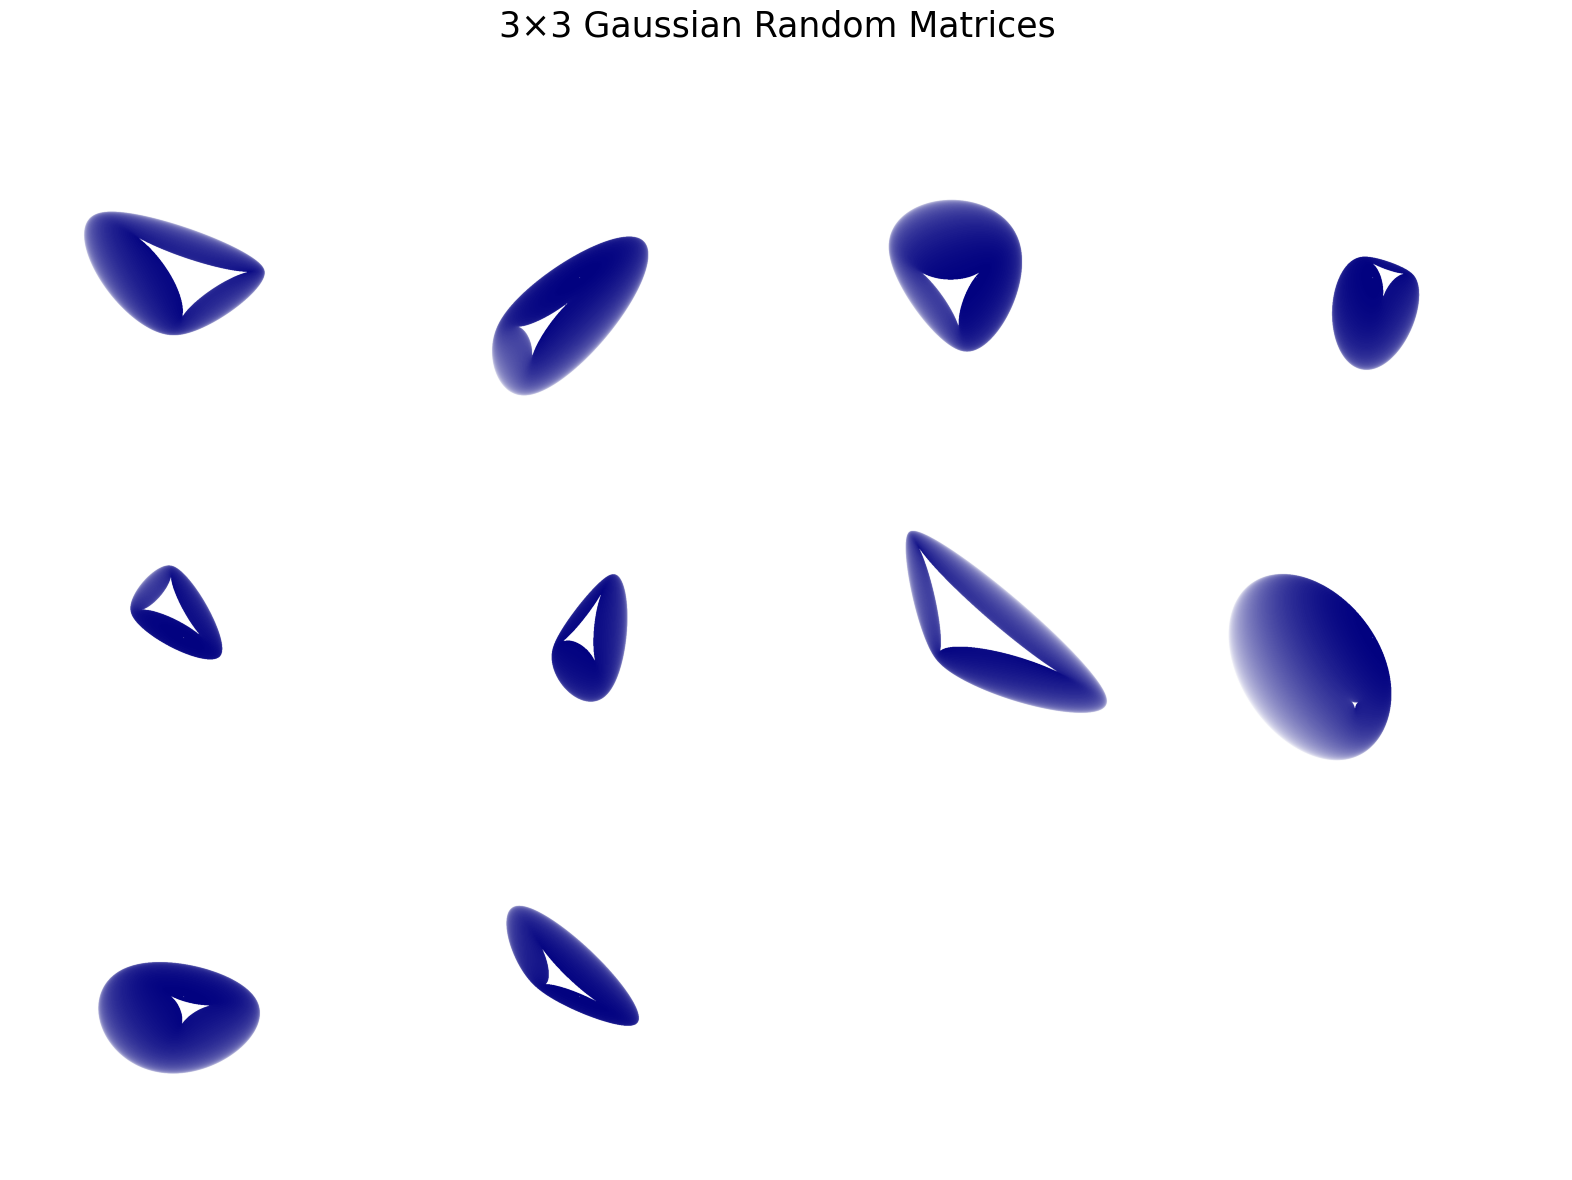

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/build')
import spectral_density

spectral_density.set_resolution(512)
spectral_density.set_zoom(1.0)

def visualize_matrix(dim, matrix_entries, resolution=1000, zoom=1.0):
    """Visualizes the spectral density of a given complex matrix."""
    spectral_density.set_resolution(resolution)
    spectral_density.set_zoom(zoom)
    arr = np.ascontiguousarray(matrix_entries, dtype=np.float64)
    spectral_density.set_matrix(dim, arr.ctypes.data)

    # Retrieve output as packed 32-bit pixels
    output_2d = spectral_density.get_output_numpy()
    
    # Convert 0xAARRGGBB format to an RGBA image
    r = (output_2d >> 16) & 0xFF
    g = (output_2d >>  8) & 0xFF
    b = (output_2d      ) & 0xFF
    a = (output_2d >> 24) & 0xFF
    rgba_image = np.stack([r, g, b, a], axis=-1).astype(np.uint8)

    return rgba_image

def generate_gaussian_matrix(dim, mean=0, std=1):
    """Generates a dim × dim complex Gaussian random matrix."""
    real_part = np.random.normal(mean, std, (dim, dim))
    imag_part = np.random.normal(mean, std, (dim, dim))
    # interleave real and imag in a flat array as expected by C
    return np.column_stack([real_part.ravel(), imag_part.ravel()]).flatten()

def plot_multiple_matrices(dim, num_plots=6, resolution=800, zoom=1.0):
    """Generates and plots num_plots Gaussian random matrices in a grid."""
    # determine grid size
    cols = math.ceil(math.sqrt(num_plots))
    rows = math.ceil(num_plots / cols)
    figsize = (cols * 4, rows * 4)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes_flat = axes.ravel() if hasattr(axes, "ravel") else [axes]

    for idx in range(rows * cols):
        ax = axes_flat[idx]
        if idx < num_plots:
            entries = generate_gaussian_matrix(dim)
            img = visualize_matrix(dim, entries, resolution, zoom)
            ax.imshow(img)
        ax.axis("off")

    plt.suptitle(f"{dim}×{dim} Gaussian Random Matrices", fontsize=25)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# example usage:
plot_multiple_matrices(dim=3, num_plots=10, resolution=1000, zoom=0.5)